# Projeto

## Data Preparation

### 2 Alternativas (mudar para 3 se houver tempo):
1. Standard Scaler

2. MinMax Scaler - aplicar nas simbolicas tambem, o grafico fica com valores acima de 1 senao o fizer

3. Aplicar os dois ao mesmo tempo em diff colunas

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import subplots, show

## tratar da primeira coluna nos notebooks anteriores
filename = 'data_preparation_csvs/outliers_treatment_csvs/outliers_alt1_data.csv'
data_outliers: pd.DataFrame = pd.read_csv(filename, sep=',', decimal='.', na_values='')
print(f"Dataset nr records={data_outliers.shape[0]}", f"nr variables={data_outliers.shape[1]}")
print(data_outliers.columns)
#print(data_encoded.dtypes)

nonScalerColumns = ['Month', 'Occupation', 'Payment_of_Min_Amount', 'CreditMix'
                 , 'Payment_Behaviour', 'Payday Loan', 'Personal Loan', 'Debt Consolidation Loan'
                 , 'Auto Loan', 'Not Specified Loan', 'Student Loan', 'Credit-Builder Loan'
                 , 'Mortgage Loan', 'Home Equity Loan', 'Credit_Score']

Dataset nr records=83816 nr variables=32
Index(['Month', 'Occupation', 'Payment_of_Min_Amount', 'CreditMix',
       'Payment_Behaviour', 'Payday Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Auto Loan', 'Not Specified Loan',
       'Student Loan', 'Credit-Builder Loan', 'Mortgage Loan',
       'Home Equity Loan', 'Credit_Score', 'Age', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'NumofLoan', 'Delay_from_due_date',
       'NumofDelayedPayment', 'ChangedCreditLimit', 'NumCreditInquiries',
       'OutstandingDebt', 'CreditUtilizationRatio', 'Credit_History_Age',
       'TotalEMIpermonth', 'Amountinvestedmonthly', 'MonthlyBalance'],
      dtype='object')


In [2]:
# Alternativa 1

scaler = StandardScaler()

integer_data = data_outliers[nonScalerColumns]
# Drop the integer columns from the dataset
df_zscore = data_outliers.drop(columns=nonScalerColumns)
# Perform scaling
df_zscore = pd.DataFrame(scaler.fit_transform(df_zscore), columns=df_zscore.columns)
# Append the integer columns back to the dataset
df_zscore[nonScalerColumns] = integer_data

df_zscore.to_csv(f"data_preparation_csvs/scaling_csvs/data_scaled_zscore_alt1.csv", index=False)

In [3]:
# Alternativa 2

transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True)

integer_data_2 = data_outliers[nonScalerColumns]
# Drop the integer columns from the dataset
df_minmax  = data_outliers.drop(columns=nonScalerColumns)
# Perform scaling
df_minmax  = pd.DataFrame(transf.fit_transform(df_minmax ), columns=df_minmax.columns)
# Append the integer columns back to the dataset
df_minmax [nonScalerColumns] = integer_data

df_zscore.to_csv(f"data_preparation_csvs/scaling_csvs/data_scaled_zscore_alt2.csv", index=False)


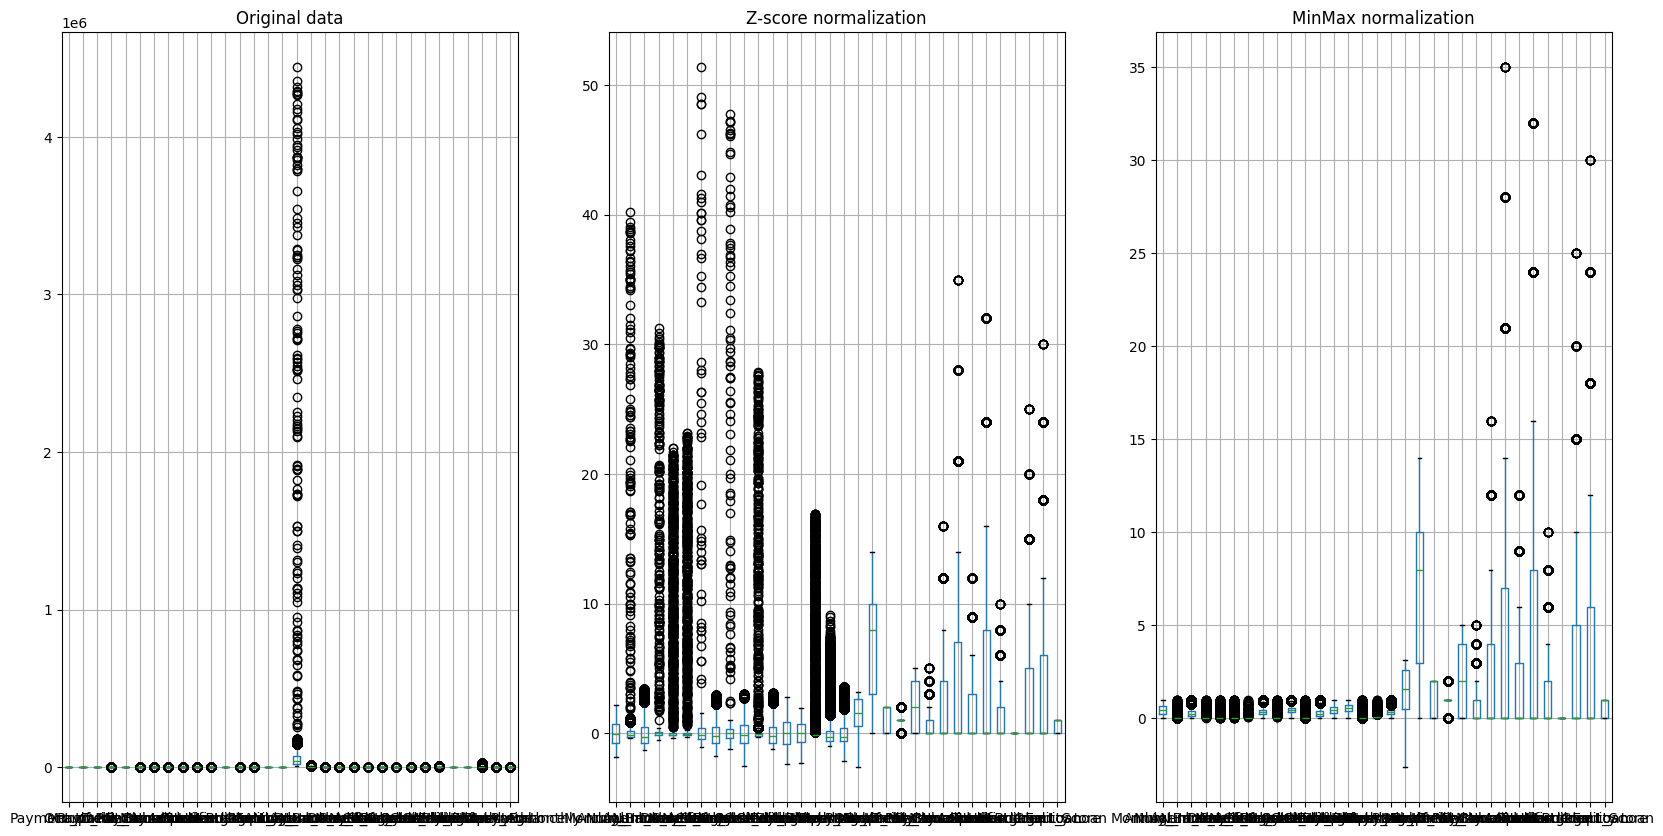

In [7]:
# Result of the transformed data with a single boxplot
fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 0].set_title("Original data")
data_outliers.boxplot(ax=axs[0, 0])
axs[0, 1].set_title("Z-score normalization")
df_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
df_minmax.boxplot(ax=axs[0, 2])
show()